# FEEED
**Fe**ature **E**xtraction for **E**vent-**D**ata

In [14]:
from feeed.feature_extractor import extract_features
import pandas as pd

In [12]:
import warnings 
warnings.filterwarnings('ignore')

INPUT_PATH = 'test_logs/Sepsis.xes'
mtf=extract_features(INPUT_PATH)
print(mtf)

     INFO: Sepsis.xes 3 simple_stats took 0:00:00.015329 sec, next trace_length...
     INFO: Sepsis.xes 32 trace_length took 0:00:00.021678 sec, next trace_variant...
     INFO: Sepsis.xes 43 trace_variant took 0:00:00.123661 sec, next activities...
     INFO: Sepsis.xes 55 activities took 0:00:00.016204 sec, next start_activities...
     INFO: Sepsis.xes 67 start_activities took 0:00:00.202298 sec, next end_activities...
     INFO: Sepsis.xes 79 end_activities took 0:00:00.191156 sec, next entropies...
     INFO: Sepsis.xes 92 entropies took 0:00:32.841378 sec, next complexity...


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

     INFO: Sepsis.xes 100 complexity took 0:00:02.534845 sec, last feature.
SUCCESSFULLY: 101 features for Sepsis.xes took 0:00:35.947614 sec.
{'log': 'Sepsis', 'n_traces': 1050, 'n_unique_traces': 846, 'ratio_unique_traces_per_trace': 0.8057142857142857, 'trace_len_min': 3, 'trace_len_max': 185, 'trace_len_mean': 14.48952380952381, 'trace_len_median': 13.0, 'trace_len_mode': 8, 'trace_len_std': 11.470474925273926, 'trace_len_variance': 131.57179501133788, 'trace_len_q1': 9.0, 'trace_len_q3': 16.0, 'trace_len_iqr': 7.0, 'trace_len_geometric_mean': 12.281860759040903, 'trace_len_geometric_std': 1.7464004837799154, 'trace_len_harmonic_mean': 10.47731701485374, 'trace_len_skewness': 7.250526815880918, 'trace_len_kurtosis': 87.0376906898399, 'trace_len_coefficient_variation': 0.7916391922924689, 'trace_len_entropy': 6.769403523350811, 'trace_len_hist1': 0.048613291470434326, 'trace_len_hist2': 0.005285190999476714, 'trace_len_hist3': 0.0005756148613291472, 'trace_len_hist4': 0.000209314495

### Feature distribution of real data

In [22]:
dmf = pd.read_csv("../tag/data/real_event_logs.csv", index_col=None)
dmf = dmf.drop(['Unnamed: 0'], axis=1)
print(dmf.shape)
print(len(dmf), " Event-Logs: ", dmf['log'].unique())
dmf.head()

(23, 94)
23  Event-Logs:  ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7,Log Nature
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,7.105,7.105,7.105,7.105,7.105,7.105,5.545,5.039,4.721,Real
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,-0.010,1.855,0.511,1.403,3.572,2.001,7.849,7.371,7.067,Real
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.672,2.966,0.804,1.484,2.966,2.966,3.260,2.845,2.584,Real
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,-0.007,6.780,6.780,6.780,6.780,6.780,5.701,5.212,4.900,Real
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,-0.041,1.530,0.840,0.620,3.244,1.913,7.333,6.882,6.601,Real


23 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


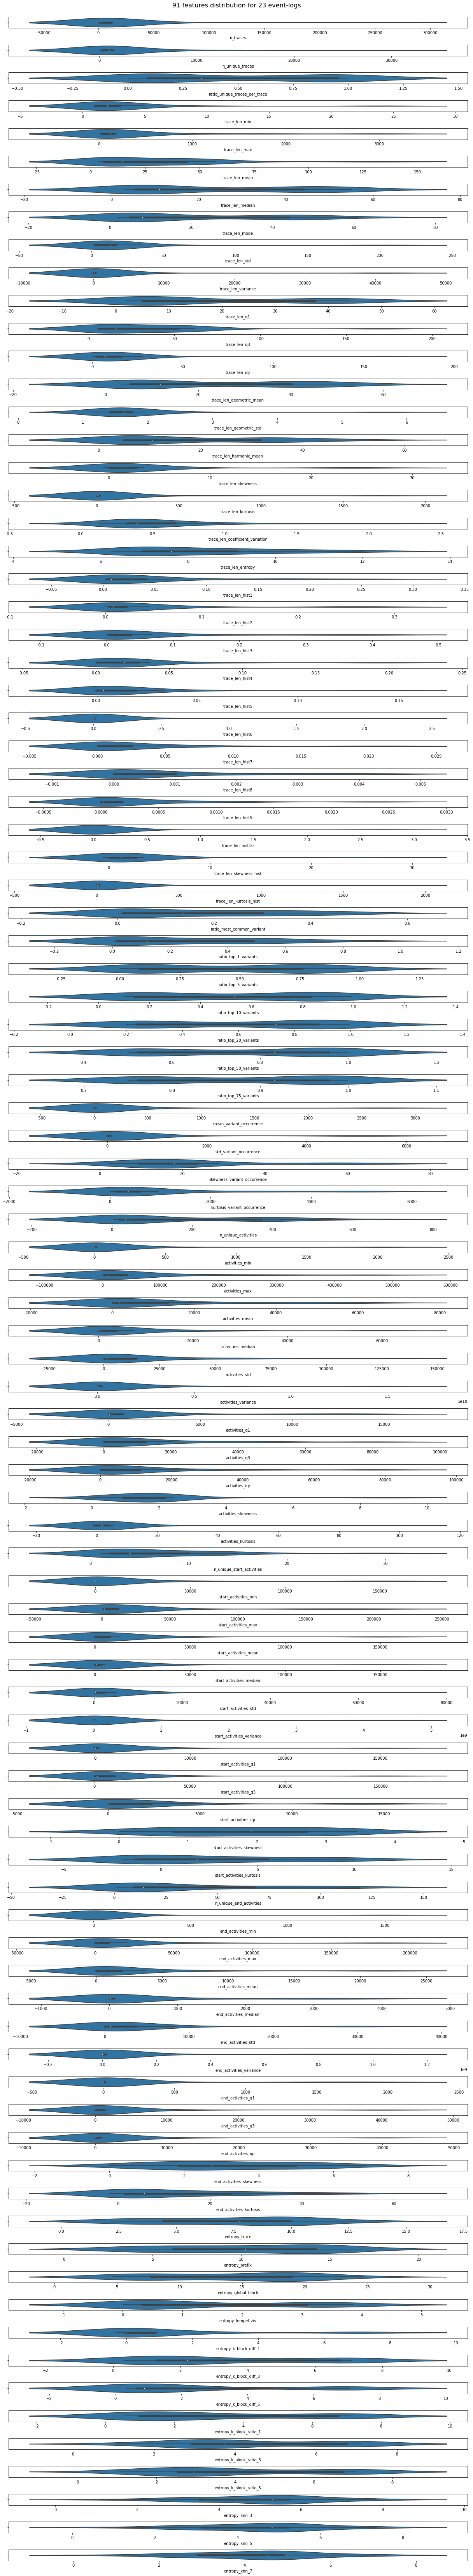

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(dmf), dmf['log'].unique())

columns = dmf.columns[3:]
dmf1=dmf.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=dmf, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(dmf)} event-logs", fontsize=16, y=1)
fig.tight_layout()